In [3]:
from scipy import stats

x = [32, 64, 96, 118, 126, 144, 152, 158]
y = [18, 24, 61.5, 49, 52, 105, 130, 125]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
# 선형 최소 회귀를 계산

print("slope: {}\nintercept: {}\nr_value: {}\np_value: {}\nstd_err: {}".format(slope,
                                                                               intercept,
                                                                               r_value,
                                                                               p_value,
                                                                               std_err))


slope: 0.8744839346616406
intercept: -26.723837731107523
r_value: 0.8880668255497455
p_value: 0.00321829451984264
std_err: 0.18480710092393707


<function matplotlib.pyplot.show(close=None, block=None)>

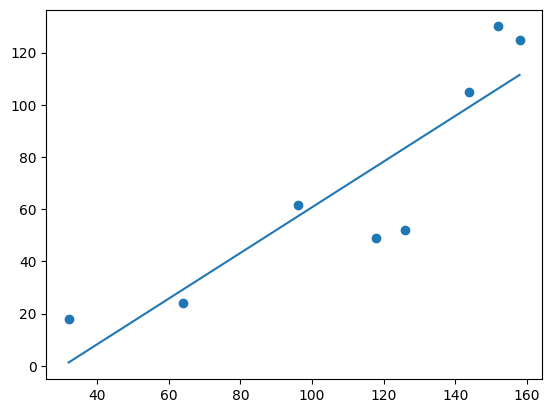

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.plot(x, slope * np.array(x) + intercept, '-')
plt.show

In [5]:
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings(action='ignore') # 경고 무시

boston = load_boston()

X = boston.data
y = boston.target

In [35]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [49]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
from sklearn.linear_model import LinearRegression

model_boston = LinearRegression().fit(X_train_scaled, y_train)

print(model_boston.coef_) # coef _: 추정된 가중치 벡터 (W)
print(model_boston.intercept_) # intercept _: 추정된 상수항 (b)

[-11.87445333   3.40184679   1.31383578   3.11983512  -7.4926916
  19.94924862  -1.0507031  -15.24168408   5.58272882  -4.55997081
  -8.56044096   4.67731048 -19.82738646]
26.028229324073685


In [51]:
model_boston.score(X_train_scaled, y_train)

0.7434997532004697

In [52]:
model_boston.score(X_test_scaled, y_test)

0.7112260057484927

In [40]:
from sklearn.model_selection import cross_val_score

r2 = cross_val_score(model_boston, X_train_scaled, y_train, cv=5)
r2

array([0.74541483, 0.52216586, 0.75607169, 0.76738846, 0.64887182])

In [41]:
r2.mean()

0.6879825316957147

In [42]:
import math
from sklearn.metrics import mean_squared_error
# mean_squared_error : 평균 제곱 오차

math.sqrt(mean_squared_error(y_train, model_boston.predict(X_train_scaled)))
# 표준 오차 구하기

y_pred = model_boston.predict(X_test_scaled)
y_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

In [43]:
import math
from sklearn.metrics import mean_squared_error

rmse_test = math.sqrt(mean_squared_error(y_test, y_pred))
# rmse : 루트 평균 제곱 오류

rmse_test

4.638689926172824

In [44]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)
# 결정 계수 구하기
# 결정 계수 (r2, R-squared) : 상관 계수를 제곱한 값

0.7112260057484927

# 후진 소거법

In [58]:
import statsmodels.api as sm

Boston = sm.datasets.get_rdataset('Boston', package='MASS')

boston_df = Boston.data
boston_df
# 타겟 데이터인 medv가 같이 출력됨

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [62]:
import statsmodels.formula.api as smf

formula = 'medv~' + '+'.join(boston_df.iloc[:, :-1].columns)
# ~을 기준으로 왼쪽은 타겟 데이터, 오른쪽은 독립 변수이며, +로 연결됨

formula
# 'medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

'medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

In [60]:
model_boston1 = smf.ols(formula=formula, data=boston_df).fit()
model_boston1.summary()
# R-squared : 0.741 (정확도)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          6.72e-135
Time:                        10:14:26   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
import statsmodels.formula.api as smf

formula = 'medv~ rad + zn + rm + chas + age -1'
# 마지막의 -1은 Intercept 칼럼을 의미

model_boston2 = smf.ols(formula=formula, data=boston_df).fit()
model_boston2.summary()
# R-squared : 0.932 (정확도)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              1363.
Date:                Fri, 07 Oct 2022   Prob (F-statistic):                   5.05e-289
Time:                        10:14:59   Log-Likelihood:                         -1654.6
No. Observations:                 506   AIC:                                      3319.
Df Residuals:                     501   BIC:                                      3340.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rad           -0.2183      0.037     -5.924      0.000      -0.291      -0.146
zn             0.0161      0.015      1.056      0.291      -0.014       0.046
rm             4.7232      0.147     32.166      0.000       4.435       5.012
chas           5.6944      1.128      5.047      0.000       3.478       7.911
age           -0.0792      0.012     -6.358      0.000      -0.104      -0.055
==============================================================================
Omnibus:                      234.375   Durbin-Watson:                   0.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.471
Skew:                           2.008   Prob(JB):                    6.49e-273
Kurtosis:                       9.583   Cond. No.                         299.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 보스턴 집값 데이터의 VIF 확인

In [64]:
import statsmodels.api as sm

Boston = sm.datasets.get_rdataset('Boston', package='MASS')

boston_df = Boston.data
boston_df
# 타겟 데이터인 medv가 같이 출력됨

formula = 'medv~' + '+'.join(boston_df.iloc[:, :-1].columns)
# ~을 기준으로 왼쪽은 타겟 데이터, 오른쪽은 독립 변수이며, +로 연결됨

formula
# 'medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

'medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

In [69]:
from patsy import dmatrices # 디자인 행렬 수행

y, X = dmatrices(formula, boston_df, return_type='dataframe')
y
# medv라는 타겟 데이터만 출력

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [71]:
X
# intercept를 추가한 독립 변수들만 출력

,Intercept,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [72]:
import pandas as pd

vif = pd.DataFrame()

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif['VIF Factor'] = [variance_inflation_factor(X.values, i)
                    for i in range(X.shape[1])]

# vif.drop(labels='features', axis=1, inplace=True)

vif['features'] = X.columns

vif
# X.columns : boston_df의 컬럼 이름 리스트

,VIF Factor,features
0,585.265238,Intercept
1,1.792192,crim
2,2.298758,zn
3,3.991596,indus
4,1.073995,chas
5,4.393720,nox
6,1.933744,rm
7,3.100826,age
8,3.955945,dis
9,7.484496,rad


In [92]:
def get_vif(formula, df):
    from patsy import dmatrices
    y, X = dmatrices(formula, df, return_type='dataframe')

    import pandas as pd
    vif = pd.DataFrame()
    
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif['VIF Factor'] = [variance_inflation_factor(X.values, i)
                        for i in range(X.shape[1])]
    # vif.drop(labels='VIF Facto', axis=1, inplace=True)
    vif['features'] = X.columns
    
    return vif
    # X.columns : boston_df의 컬럼 이름 리스트

formula = 'medv~' + '+'.join(boston_df.iloc[:, :-1].columns) + '- 1'

print(formula)

get_vif(formula, boston_df)

medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat- 1


,VIF Factor,features
0,2.100373,crim
1,2.844013,zn
2,14.485758,indus
3,1.152952,chas
4,73.894947,nox
5,77.948283,rm
6,21.386850,age
7,14.699652,dis
8,15.167725,rad
9,61.227274,tax


In [94]:
formula = 'medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+black+lstat- 1'

print(formula)

get_vif(formula, boston_df)

medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+black+lstat- 1


,VIF Factor,features
0,2.099345,crim
1,2.451624,zn
2,14.275283,indus
3,1.142167,chas
4,73.894171,nox
5,60.598846,rm
6,21.361234,age
7,12.221605,dis
8,15.159162,rad
9,59.301541,tax


In [95]:
formula = 'medv~crim+zn+indus+chas+rm+age+dis+rad+tax+black+lstat- 1'

print(formula)

get_vif(formula, boston_df)

medv~crim+zn+indus+chas+rm+age+dis+rad+tax+black+lstat- 1


,VIF Factor,features
0,2.097537,crim
1,2.449661,zn
2,13.150904,indus
3,1.138277,chas
4,41.406746,rm
5,19.889623,age
6,12.032952,dis
7,15.155012,rad
8,57.720347,tax
9,18.396072,black


In [96]:
formula = 'medv~crim+zn+indus+chas+rm+age+dis+rad+black+lstat- 1'

print(formula)

get_vif(formula, boston_df)

medv~crim+zn+indus+chas+rm+age+dis+rad+black+lstat- 1


,VIF Factor,features
0,2.097466,crim
1,2.375219,zn
2,9.290080,indus
3,1.118613,chas
4,39.069063,rm
5,19.780944,age
6,11.817803,dis
7,4.965633,rad
8,18.289917,black
9,9.046248,lstat


In [97]:
formula = 'medv~crim+zn+indus+chas+age+dis+rad+black+lstat- 1'

print(formula)

get_vif(formula, boston_df)

medv~crim+zn+indus+chas+age+dis+rad+black+lstat- 1


,VIF Factor,features
0,2.095367,crim
1,2.334763,zn
2,9.016142,indus
3,1.116229,chas
4,14.000758,age
5,8.447694,dis
6,4.771767,rad
7,13.537020,black
8,8.358925,lstat


In [98]:
formula = 'medv~crim+zn+indus+chas+dis+rad+black+lstat- 1'

print(formula)

get_vif(formula, boston_df)

medv~crim+zn+indus+chas+dis+rad+black+lstat- 1


,VIF Factor,features
0,2.095211,crim
1,2.313889,zn
2,8.205465,indus
3,1.106350,chas
4,8.209371,dis
5,4.689836,rad
6,10.074224,black
7,6.856889,lstat


In [99]:
formula = 'medv~crim+zn+indus+chas+dis+rad+lstat- 1'

print(formula)

get_vif(formula, boston_df)

medv~crim+zn+indus+chas+dis+rad+lstat- 1


,VIF Factor,features
0,2.067135,crim
1,2.299351,zn
2,6.900077,indus
3,1.086574,chas
4,3.968908,dis
5,4.678181,rad
6,6.726973,lstat


In [100]:
import statsmodels.formula.api as smf

formula = 'medv~crim+zn+indus+chas+dis+rad+lstat- 1'
# 마지막의 -1은 Intercept 칼럼을 의미

model_boston2 = smf.ols(formula=formula, data=boston_df).fit()
model_boston2.summary()
# R-squared : 0.822 (정확도)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.822
Model:                            OLS   Adj. R-squared (uncentered):              0.820
Method:                 Least Squares   F-statistic:                              330.1
Date:                Fri, 07 Oct 2022   Prob (F-statistic):                   1.03e-182
Time:                        11:07:30   Log-Likelihood:                         -1895.9
No. Observations:                 506   AIC:                                      3806.
Df Residuals:                     499   BIC:                                      3835.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.1840      0.071     -2.599      0.010      -0.323      -0.045
zn             0.0529      0.027      1.970      0.049       0.000       0.106
indus          0.8391      0.092      9.098      0.000       0.658       1.020
chas           9.1546      1.820      5.031      0.000       5.580      12.730
dis            3.6821      0.211     17.469      0.000       3.268       4.096
rad            0.1755      0.077      2.283      0.023       0.024       0.327
lstat         -0.3776      0.082     -4.606      0.000      -0.539      -0.217
==============================================================================
Omnibus:                       94.793   Durbin-Watson:                   0.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.764
Skew:                           1.110   Prob(JB):                     2.75e-36
Kurtosis:                       4.686   Cond. No.                         107.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 정규화 선형회귀(Ridge, Lasso, Elastic-net)

In [111]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

data = load_diabetes()

X_train, X_test, y_train, y_test = train_test_split(data.data,
                                                    data.target,
                                                    random_state=42)

In [126]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [115]:
data.data.shape

(442, 10)

In [117]:
data.data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [119]:
data.target.shape

(442,)

In [121]:
data.target[0:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [122]:
data.feature_names
# load_diabetes
# age : 연령
# sex : 성별
# bmi : 체질량 지수
# bp : 평균 혈압
# s1 : tc, 총 혈청 콜레스테롤
# s2 : ldl, 저밀도 지단백질
# s3 : hdl, 저밀도 지단백질
# s4 : tch, 총 콜레스테롤 / HDL
# s5 : ltg, (아마도) 혈철 트리글리세리드 수준의 로그
# s6 : glu, 혈당 수치

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [127]:
# Ridge Regression 모델
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
# 하이퍼 파라미터
# alpha : 람다

ridge.fit(X_train, y_train)

ridge.score(X_test, y_test), ridge.coef_
# 0.4384009113704955

(0.4384009113704955,
 array([  50.55155508,  -67.72236516,  278.3007281 ,  197.62401363,
          -6.2459735 ,  -26.22698465, -151.39451804,  120.32319558,
         215.85469359,  101.75554294]))

In [128]:
# Lasso Regression 모델
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
# 하이퍼 파라미터
# alpha : 람다

lasso.fit(X_train, y_train)

lasso.score(X_test, y_test), lasso.coef_
# 0.37914194389255096

(0.37914194389255096,
 array([  0.        ,  -0.        , 398.38436775,  46.17884277,
          0.        ,   0.        ,  -0.        ,   0.        ,
        238.18740159,   0.        ]))

In [132]:
# Elastic-net Regression 모델
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)
# 하이퍼 파라미터
# alpha : 람다
# l1_ratio=0.5 : lasso 식의 비율 (비율이 달라지면 출력 값도 달리짐)

elastic.fit(X_train, y_train)

elastic.score(X_test, y_test), elastic.coef_
# -0.0044383730131891674

(-0.0044383730131891674,
 array([ 0.41308763,  0.        ,  3.29899112,  2.25693877,  0.33937965,
         0.08078391, -1.87466133,  2.1438686 ,  2.94796429,  1.70198081]))

In [138]:
# 정규화 선형회귀 모델별 가중치(계수) 비교
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# 선형 모델을 비교하기 위해 생성
linear = LinearRegression()
linear.fit(X_train, y_train)
linear.score(X_train, y_train), linear.score(X_test, y_test)

(0.5190348343200996, 0.48490866359058005)

In [139]:
# 계수를 한 문에 비교하기 위힌 DataFrame
coefs = np.vstack((linear.coef_,
                   ridge.coef_,
                   lasso.coef_,
                   elastic.coef_))
# vstack : 수직으로 쌓아서 데이터를 출력

index = ['linear', 'ridge', 'lasso', 'elastic']

coefs_df = pd.DataFrame(coefs, columns=data.feature_names, index=index)

print("정규화 선형 회귀 모델별 가중치(계수) 비교")

coefs_df

정규화 선형 회귀 모델별 가중치(계수) 비교


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
linear,47.746571,-241.991804,531.968569,381.565299,-918.490206,508.251474,116.940405,269.485086,695.806221,26.323431
ridge,50.551555,-67.722365,278.300728,197.624014,-6.245973,-26.226985,-151.394518,120.323196,215.854694,101.755543
lasso,0.000000,-0.000000,398.384368,46.178843,0.000000,0.000000,-0.000000,0.000000,238.187402,0.000000
elastic,0.413088,0.000000,3.298991,2.256939,0.339380,0.080784,-1.874661,2.143869,2.947964,1.701981


# LinearRegression을 이용한 보스턴 주택 가격 예측

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터 셋 로드
boston = load_boston()

# boston 데이터 셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [176]:
# boston dataset의 target array는 주택 가격
# 이를 PRICE 컬럼으로 DataFrame에 추가함
bostonDF['PRICE'] = boston.target

print('Boston 데이터 셋 크기 :',bostonDF.shape)
bostonDF.head()
# Boston 데이터 셋 크기 : (506, 14)

Boston 데이터 셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


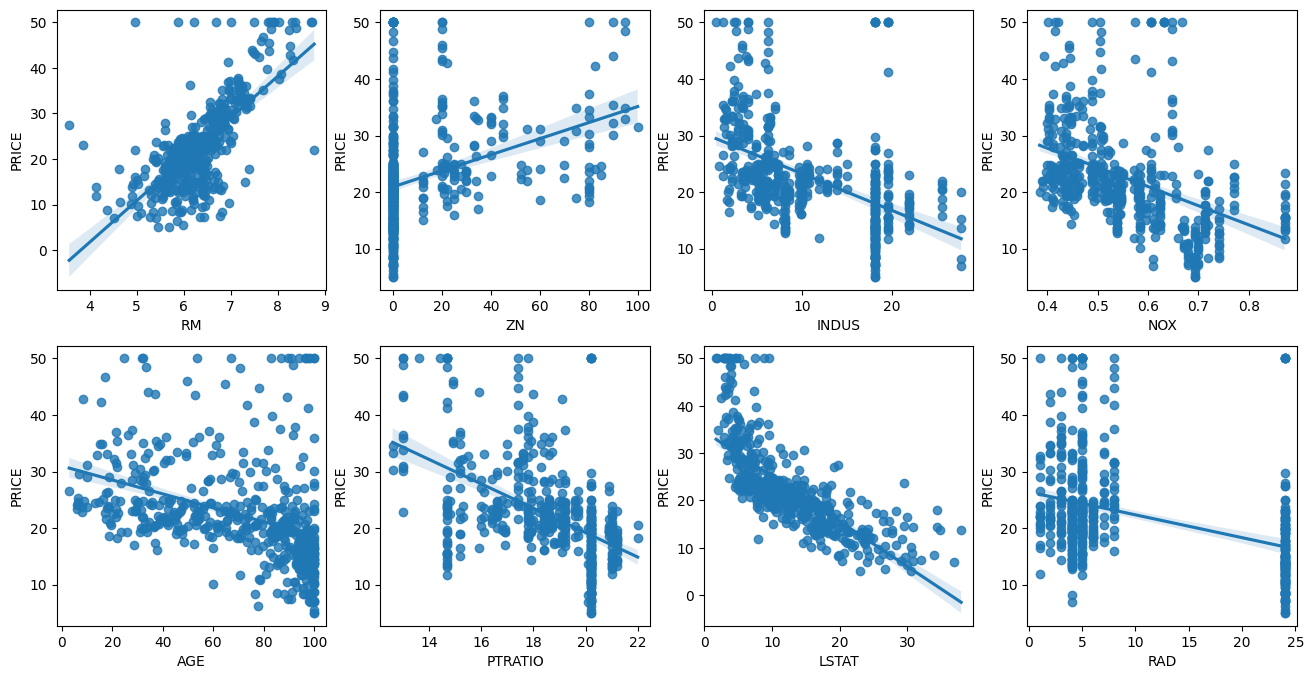

In [177]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)

lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE','PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(lm_features):
    row = int(i / 4)
    col = i % 4
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_target,
                                                    test_size=0.3,
                                                    random_state=156)

In [179]:
# Linear Regression OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train ,y_train )

y_preds = lr.predict(X_test)
y_preds

array([23.15424087, 19.65590246, 36.42005168, 19.96705124, 32.40150641,
       17.66341192, 30.32844101, 17.8513932 , 10.86187069, 12.83177966,
       21.18350434, 16.41212257, 28.66817527, 37.01110952, 23.42172197,
       24.56906089, 14.55434775, 11.51023436, 30.27784089, 23.48027467,
       22.86210577, 17.61623753, 21.2528808 , 17.29802868, 34.06118291,
        7.19879841, 13.39928425, 19.4234468 , 13.2423286 ,  8.3336837 ,
       29.34933073, 11.83768837, 19.84125562, 23.97623235, 16.34351261,
       13.20973749, 14.3352014 , 17.26323753, 17.37091562, 23.84644351,
       32.8390912 ,  9.3866759 , 19.06694335, -3.98840206, 19.87721947,
       21.26003361, 24.17775745, 35.35923599, 20.32415303, 28.23212889,
       32.67560962, 40.83910565, 41.19126206, 19.78588457, 25.0134137 ,
       24.13111046, 19.62715719, 33.49344219, 23.61402811, 15.31513017,
       22.70657074, 25.78436589, 23.99723589,  8.78013424, 21.81929237,
       39.68193998, 32.8907251 , 30.20417723, 14.35610647, 23.56

In [180]:
mse = mean_squared_error(y_test, y_preds)

rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))
# MSE : 17.297 , RMSE : 4.159
# Variance score : 0.757

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [181]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))
# 절편 값: 40.99559517216429
# 회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
#   -0.6]

절편 값: 40.99559517216429
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [182]:
alphas = [0, 0.1, 1, 10, 100]
# 람다 지정

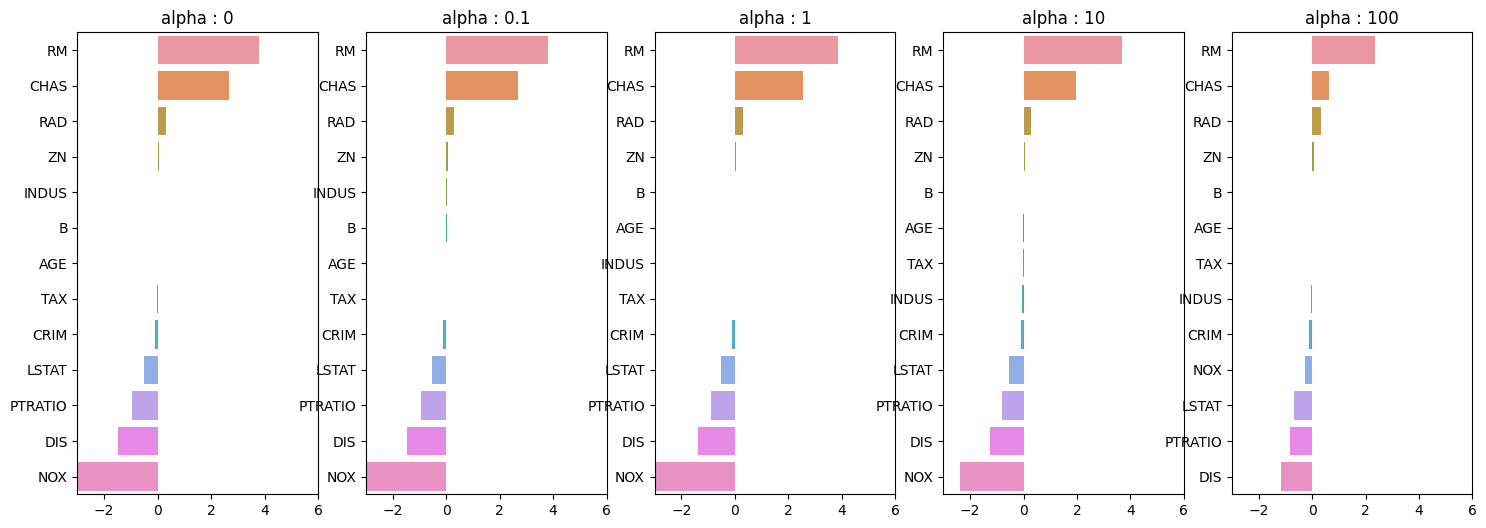

In [183]:
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha : ' + str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()

In [194]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_val_score

def get_linear_reg_eval(model_name,
                       params=None,
                       X_data_n=None,
                       y_target_n=None,
                       verbose=True):
    coeff_df = pd.DataFrame()
    
    if verbose : print('#######', model_name, '#######')
    
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        
        neg_mse_scores = cross_val_score(model,
                                         X_data_n,
                                         y_target_n,
                                         scoring="neg_mean_squared_error",
                                         cv = 5)

        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        
        # cross_val_score는 evaluation metric맊 반환하므로
        # 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data , y_target)
        coeff = pd.Series(data=model.coef_ , index=X_data.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df

In [195]:
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]

coeff_lasso_df =get_linear_reg_eval('Lasso',
                                    params=lasso_alphas,
                                    X_data_n=X_data,
                                    y_target_n=y_target)

####### Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [198]:
sort_column = 'alpha:' + str(lasso_alphas[0])

coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


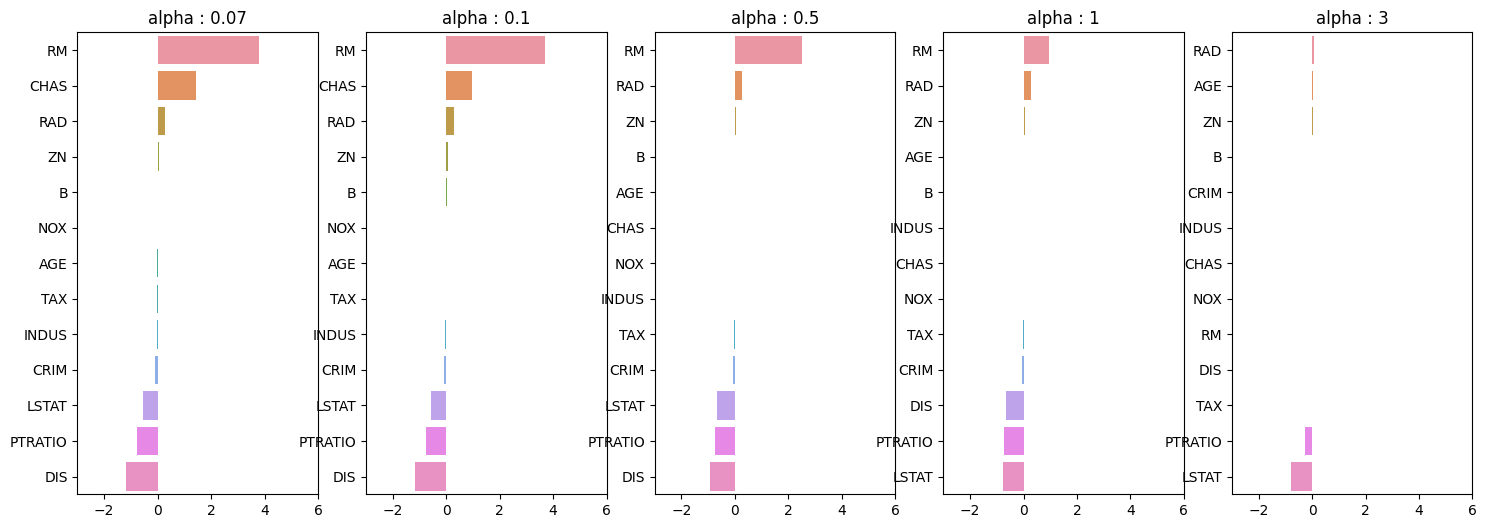

In [201]:
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(lasso_alphas):
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_data, y_target)
    coeff = pd.Series(data=lasso.coef_, index=X_data.columns)
    colname = 'alpha : ' + str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()